# Exercise 1 - Bayesian Inference for Poisson model
A quality control engineer works at a factory that produces washing machines. The number of defective washing machines manufactured each day follows a Poisson distribution with an unknown rate parameter µ. 
The objective of the engineer is to estimate µ based on observed data and prior knowledge. 
Over the next 5 days, he observes the following number of defective products: x = (3, 0, 1, 5, 2).

(1) Assuming a positive uniform prior distribution for the parameter µ
- Determine and draw the posterior distribution for µ, given the data
- Evaluate mean, median and variance, both analytically and numerically in R

(2) Taking into account that historical data from similar factories suggest that the rate of defective washing machines is around 2 per day, with standard deviation of 1, model your belief using the suitable Gamma prior and then
- Determine and draw the posterior distribution for µ, given the data
- Evaluate mean, median and variance, both analytically and numerically in R.

(3) Evaluate a 95% credibility interval for the results obtained with different priors (you can also try with other priors). In addition, compare the results obtained using Gamma posterior distribution with a normal approximation that matches the same mean and standard deviation.

# Exercise 2 - Efficiency using Bayesian approach

A researcher A wants to evaluate the efficiency of detector 2 (Det2). 
For this purpose, he sets up the apparatus shown in the figure 1, where Det2 is sandwiched between Det1 and Det3. 
Let n be the number of signals recorded simultaneously by Det1 and Det3, and r be those also recorded by Det2, researcher A obtains n = 20 and r = 12.

Assuming a binomial model where n is the number of trials and r is the number of
success out of n trials,

(1) Evaluate the mean and the standard deviation using a Bayesian approach under the hypothesis of:
- uniform prior ∼ U(0, 1)
- Jeffrey’s prior ∼ Beta(1/2, 1/2)

In [1]:
nA <- 20
rA <- 12

unif_alpha <- 1 + rA
unif_beta <- 1 + nA - rA

unif_mean <- unif_alpha / (unif_alpha + unif_beta)
unif_sd <- sqrt(unif_alpha * unif_beta / ((unif_alpha + unif_beta)^2 * (unif_alpha + unif_beta + 1)))

cat("Unif. mean:", unif_mean, "\nUnif. SD:", unif_sd)

jeff_alpha <- 0.5 + rA
jeff_beta <- 0.5 + nA - rA

jeff_mean <- jeff_alpha / (jeff_alpha + jeff_beta)
jeff_sd <- sqrt(jeff_alpha * jeff_beta / ((jeff_alpha + jeff_beta)^2 * (jeff_alpha + jeff_beta + 1)))

cat("\nJeff. Mean:", unif_mean, "\nJeff. SD:", unif_sd)

Unif. mean: 0.5909091 
Unif. SD: 0.1025195
Jeff. Mean: 0.5909091 
Jeff. SD: 0.1025195

(2) Plot the posterior distributions for both cases

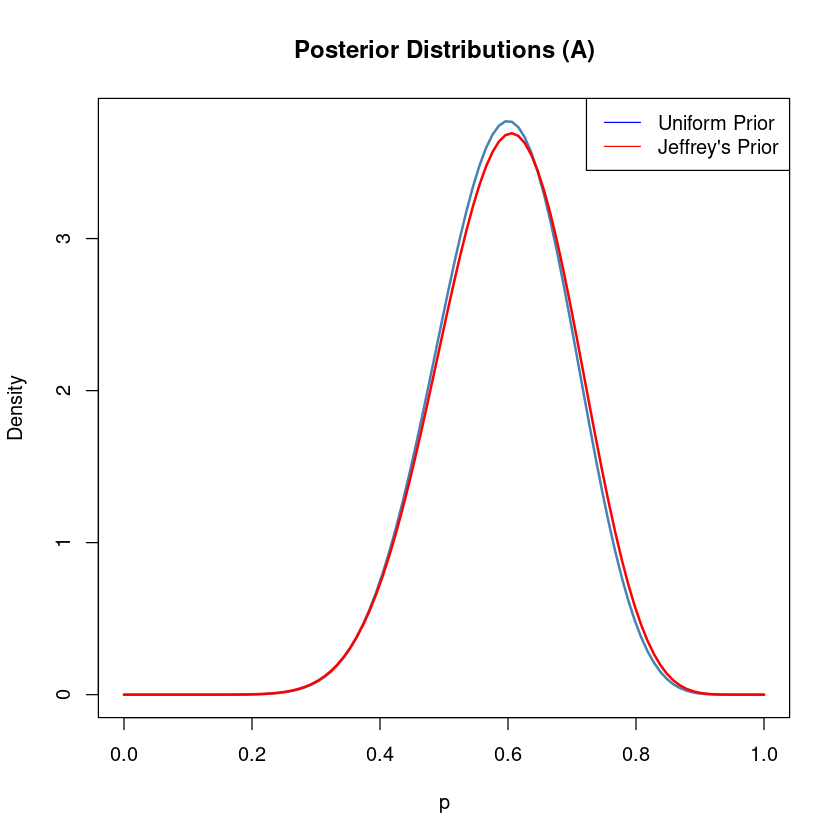

In [2]:
x <- seq(0, 1, length.out=100)
plot(x, dbeta(x, unif_alpha, unif_beta), 
     type = "l", col = "steelblue", lwd = 2,
     ylab = "Density", xlab = "p", 
     main = "Posterior Distributions (A)")
lines(x, dbeta(x, jeff_alpha, jeff_beta), col = "red", lwd = 2)
legend("topright", legend = c("Uniform Prior", "Jeffrey's Prior"), 
       col = c("blue", "red"), lty = 1)

Taking into account that the same detector has been studied by researcher B, who has performed only n = 10 measurements and has obtained r = 10 signals,

(3) Evaluate the mean, the standard deviation and the posterior distribution using a uniform prior with the results of researcher B.

Unif. mean: 0.9166667 
Unif. SD: 0.07665552

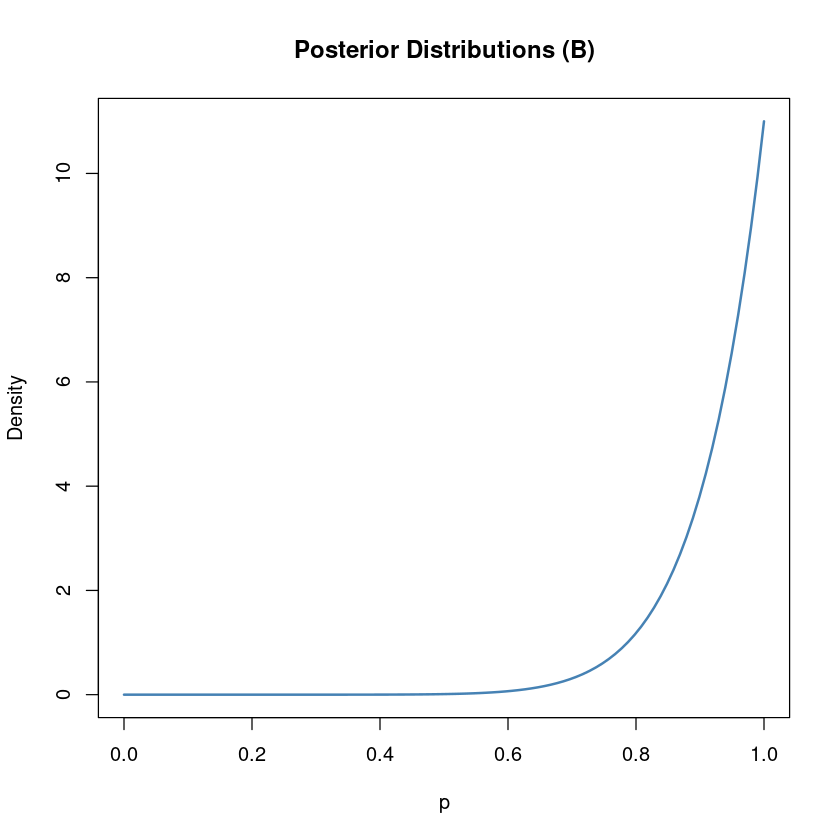

In [3]:
nB <- 10
rB <- 10

alphaB <- 1 + rB
betaB <- 1 + nB - rB

unif_mean <- alphaB / (alphaB + betaB)
unif_sd <- sqrt(alphaB * betaB / ((alphaB + betaB)^2 * (alphaB + betaB + 1)))

cat("Unif. mean:", unif_mean, "\nUnif. SD:", unif_sd)

plot(x, dbeta(x, alphaB, betaB), 
     type = "l", col = "steelblue", lwd = 2,
     ylab = "Density", xlab = "p", 
     main = "Posterior Distribution (B)")

(4) Repeat the computation of points (1) and (2) with the data of researcher A using as a prior the posterior obtained from point (3).

Unif. mean: 0.71875 
Unif. SD: 0.07826692

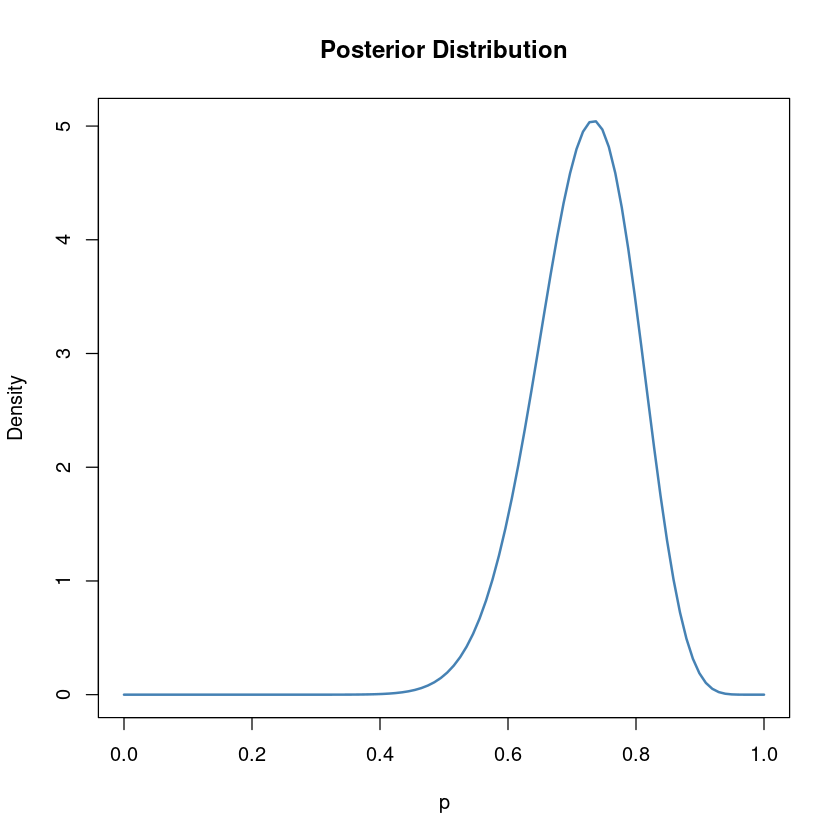

In [4]:
alpha_new <- alphaB + rA
beta_new <- betaB + nA - rA

unif_mean <- alpha_new / (alpha_new + beta_new)
unif_sd <- sqrt(alpha_new * beta_new / ((alpha_new + beta_new)^2 * (alpha_new + beta_new + 1)))

cat("Unif. mean:", unif_mean, "\nUnif. SD:", unif_sd)

plot(x, dbeta(x, alpha_new, beta_new), 
     type = "l", col = "steelblue", lwd = 2,
     ylab = "Density", xlab = "p",
     main = "Posterior Distribution")

(5) Compute 95% credible interval using the posterior of the previous point (4).

In [10]:
ci <- qbeta(c(0.025, 1-0.025), alpha_new, beta_new)
cat("Credible interval: [", ci[1], ", ", ci[2], "]", sep="")

Credible interval: [0.5538661, 0.8577715]